In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder
import nltk
from sklearn.model_selection import train_test_split
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import time

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
df_data = pd.read_csv('gdrive/My Drive/TA/Copy of DoSbyMasase.csv')
df_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,0.000000000,JuniperN_88:97:c7,Broadcast,ARP,60,Who has 10.75.88.190? Tell 10.75.80.3,Normal
1,2,0.204384536,JuniperN_88:97:c7,Broadcast,ARP,60,Who has 10.75.81.199? Tell 10.75.80.3,Normal
2,3,0.306643107,JuniperN_88:97:c7,Broadcast,ARP,60,Who has 10.75.90.88? Tell 10.75.80.3,Normal
3,4,0.306778680,JuniperN_88:97:c7,Broadcast,ARP,60,Who has 10.75.82.122? Tell 10.75.80.3,Normal
4,5,0.613851839,JuniperN_88:97:c7,Broadcast,ARP,60,Who has 10.75.93.245? Tell 10.75.80.3,Normal


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20169 entries, 0 to 20168
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          20169 non-null  int64 
 1   Time         20169 non-null  object
 2   Source       20169 non-null  object
 3   Destination  20169 non-null  object
 4   Protocol     20169 non-null  object
 5   Length       20169 non-null  int64 
 6   Info         20169 non-null  object
 7   Type         20169 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


In [4]:
df_data.drop(['No.'], axis=1, inplace = True)
df_data.drop(['Info'], axis=1, inplace = True)
df_data.drop(['Time'], axis=1, inplace = True)
print (df_data.isnull().sum())

Source         0
Destination    0
Protocol       0
Length         0
Type           0
dtype: int64


In [5]:
le = LabelEncoder()
 
df_data['Type']= le.fit_transform(df_data['Type'])
df_data['Source']= le.fit_transform(df_data['Source'])
df_data['Destination']= le.fit_transform(df_data['Destination'])
df_data['Protocol']= le.fit_transform(df_data['Protocol'])


df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20169 entries, 0 to 20168
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Source       20169 non-null  int64
 1   Destination  20169 non-null  int64
 2   Protocol     20169 non-null  int64
 3   Length       20169 non-null  int64
 4   Type         20169 non-null  int64
dtypes: int64(5)
memory usage: 788.0 KB


In [6]:
print (df_data.isnull().sum())

Source         0
Destination    0
Protocol       0
Length         0
Type           0
dtype: int64


In [7]:
x = df_data.drop(['Type'], axis = 1)
x.head()

,Source,Destination,Protocol,Length
0,23,22,0,60
1,23,22,0,60
2,23,22,0,60
3,23,22,0,60
4,23,22,0,60


In [8]:
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [9]:
y = df_data['Type']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [10]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 13815, 1: 6354})


In [11]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [12]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({1: 13815, 0: 13815})


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state= 100)

In [14]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [15]:
model = Sequential()
model.add(SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2]) ,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=72, verbose=1, validation_data=(X_test, y_test), shuffle=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               17024     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
231/231 [==============================] - 3s 6ms/step - loss: 0.2085 - accuracy: 0.9399 - val_loss: 0.0642 - val_accuracy: 0.9900
Epoch 2/10
231/231 [======================

In [16]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[ True]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]


In [17]:
y_pred = y_pred[:, 0]
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

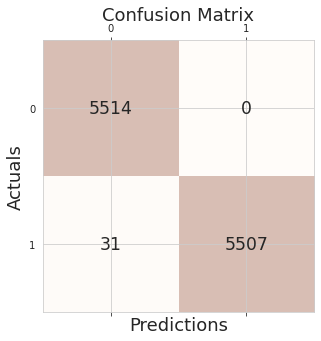

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [19]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Accuracy: 0.997195
Precision: 1.000000
Recall: 0.994402
